<a href="https://colab.research.google.com/github/gbnovaes/IA6p/blob/main/Trabalho2P%7C2%7Cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras import backend as K
from keras import utils as utls
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [18]:
# Definição de Hiperparâmetros
imageRows, imageCols, cores = 32, 32, 3
batchSize = 64
numClasses = 10
epochs = 5

In [19]:
# Carrega o dataset CIFAR-10
(XTreino, yTreino), (XTeste, yTeste) = cifar10.load_data()

In [20]:
# Normaliza os dados
XTreino = XTreino / 255.0
XTeste = XTeste / 255.0
yTreino = utls.to_categorical(yTreino, numClasses)
yTeste = utls.to_categorical(yTeste, numClasses)

In [21]:
XTreino.shape

(50000, 32, 32, 3)

In [22]:
inputShape = (imageRows, imageCols, cores)

In [23]:
# Modelo Lenet
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape = inputShape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(numClasses, activation="softmax"))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
minhaLeNetModel = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.6333 - loss: 1.0506 - val_accuracy: 0.6695 - val_loss: 0.9685
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6509 - loss: 1.0140 - val_accuracy: 0.6781 - val_loss: 0.9536
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6604 - loss: 0.9835 - val_accuracy: 0.6869 - val_loss: 0.9302
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.6669 - loss: 0.9645 - val_accuracy: 0.6957 - val_loss: 0.9145
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6722 - loss: 0.9556 - val_accuracy: 0.6899 - val_loss: 0.9071


In [27]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

       avião       0.66      0.78      0.72      1000
       carro       0.76      0.86      0.80      1000
     pássaro       0.63      0.58      0.60      1000
        gato       0.48      0.57      0.52      1000
       cervo       0.68      0.63      0.65      1000
    cachorro       0.68      0.46      0.55      1000
        sapo       0.82      0.72      0.77      1000
      cavalo       0.70      0.77      0.73      1000
       navio       0.72      0.84      0.77      1000
    caminhão       0.83      0.69      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



Text(0, 0.5, 'Acurácia')

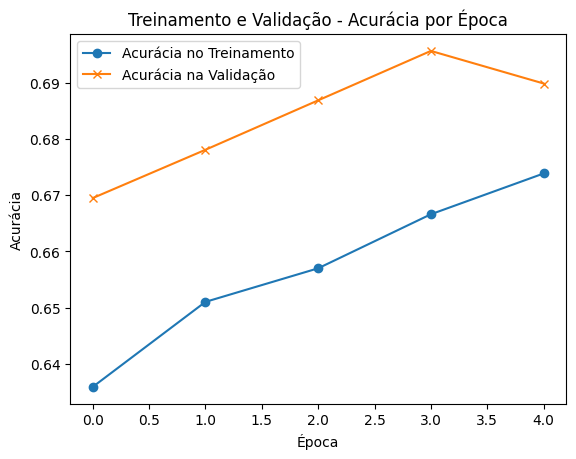

In [28]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')